# Full Text Screening
**Author:** Jack Galbraith-Edge

In [4]:
# Import libraries
from msc_code.scripts.notebook_setup import *

In [5]:
# Import results that were included from Title and Abstract Review.
import_path = os.path.join(PROC_DATA_DIR, "title_abstract_review", "title_abstract_review_include_final.csv") # Define import path.
title_abstract_included = pd.read_csv(import_path) # Import CSV to Pandas Dataframe.

# Take 'id', 'Publication Year', 'Authors', 'Title', 'Publication Title', 'Database' colums to create a new dataframe.
full_text_review_start_df = title_abstract_included[['id', 'Publication Year', 'Authors', 'Title', 'Publication Title', 'Database']]

# Add empty columns for use in review process
full_text_review_start_df['Exclude'] = None # Exclude (True/False)
full_text_review_start_df['Reason ID'] = None # Reason ID (Corresponds to Exclusion Criteria)
full_text_review_start_df['Paediatric'] = None # Paediatric Study (True/False)
full_text_review_start_df['Intention Reported'] = None # Intention Reported (True/False)
full_text_review_start_df['Deliberate Intention'] = None # Deliberate Intention (True/False)
full_text_review_start_df['Unclear'] = None # Unclear (True/False) for review with Supervisor
full_text_review_start_df['Accessed'] = None # Date resource accessed (YYYY-MM-DD)
full_text_review_start_df['Comments'] = None # Reviewed Comments

# View first five rows of dataframe
full_text_review_start_df.head()

# Save the dataframe to a CSV file for full text screening.
full_text_review_start_df.to_csv("/".join([PROC_DATA_DIR, "full_text_screen", "full_text_screen_start.csv"]), index=False)

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_46892/1468229394.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_text_review_start_df['Exclude'] = None # Exclude (True/False)
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_46892/1468229394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_text_review_start_df['Reason ID'] = None # Reason ID (Corresponds to Exclusion Criteria)
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_46892/1468229394.py:11: SettingWith

In [6]:
# Define exclusion criteria:
exclusion_criteria = {
    1: "Full text not available in English.",
    2: "Studies not focusing on intentional ingestion of foreign object via the oral cavity (mouth).",
    3: "Studies focussing solely on accidental ingestion.",
    4: "Non-Human/Animal studies.",
    5: "Reviews, editorials, commentaries, and opinion pieces without original empirical data.",
    6: "Duplicate publications or studies with overlapping data sets (the most comprehensive or recent study will be included).",
    7: "Studies focusing on ingestion of substances (e.g. poisons, medications) rather than physical foreign objects.",
    8: "Ingestions undertaken in controlled environment as part of voluntary study.",
    9: "Ingestions not explicitly stated to be intentional."
}

Full text articles were then reviewed in Zotero and tagged with 'exclude' if they met any exclusion criteria. 

Simultaneously, the exported CSV was annotated. 

In [7]:
# Troubleshoot errors in CSV encoding.

import_path = os.path.join(RAW_DATA_DIR, "full_text_screen", "full_text_screen_end_jge.csv")

# Identify the problematic line
with open(import_path, 'rb') as f:
    for i, line in enumerate(f):
        try:
            line.decode('utf-8')
        except UnicodeDecodeError as e:
            print(f"Error in line {i + 1}: {line}")
            print(f"Problematic byte: {line[e.start:e.end]}")
            break

In [8]:
# Reimport first author (JGE) screened results as pandas dataframe.
import_path = os.path.join(RAW_DATA_DIR, "full_text_screen", "full_text_screen_end_jge.csv")
jge_screened_df = pd.read_csv(import_path)

# Create dataframe of results not excluded in JGE full text screening.
jge_included = jge_screened_df[jge_screened_df['Exclude'] == False]

# Count number of results not excluded (included)
jge_include_count = len(jge_included)
print(f"Results screened and not excluded: {jge_include_count}")

# Create dataframe of results excluded in JGE full text screening. 
jge_excluded = jge_screened_df[jge_screened_df['Exclude'] == True]

# Count number of exclusions
jge_excluded_count = len(jge_excluded)

# Count number of unclear results for discussion with Supervisor
jge_unclear = jge_screened_df[jge_screened_df['Unclear'] == True]
jge_unclear_count = len(jge_unclear)
print(f"Unclear: {jge_unclear_count}")

# Create dataframe documenting exclusion reasoning
jge_excluded_reasoning = jge_excluded['Reason ID'].value_counts().rename('Count').reset_index()

# Map exclusion criteria category names to exclusion criteria Reason ID numerical values.
jge_excluded_reasoning['Reason'] = jge_excluded_reasoning['Reason ID'].map(exclusion_criteria)

# Print number of results excluded.
print(f"JGE excluded {jge_excluded_count} results during full text screening.")

# Create dataframe for items excluded without reason:
jge_exclude_no_reason = jge_excluded[(jge_excluded['Exclude'] == True ) & (jge_excluded['Reason ID'] == "NaN")]
jge_exclude_no_reason_count = len(jge_exclude_no_reason)
print(f"{jge_exclude_no_reason_count} records were excluded without a recorded reason.")
print(jge_exclude_no_reason if jge_exclude_no_reason_count > 0 else "All exclusions have reasons recorded.")

jge_excluded_reasoning

Results screened and not excluded: 121
Unclear: 12
JGE excluded 190 results during full text screening.
0 records were excluded without a recorded reason.
All exclusions have reasons recorded.


,Reason ID,Count,Reason
0,9.0,88,Ingestions not explicitly stated to be intenti...
1,5.0,35,"Reviews, editorials, commentaries, and opinion..."
2,1.0,24,Full text not available in English.
3,2.0,16,Studies not focusing on intentional ingestion ...
4,3.0,12,Studies focussing solely on accidental ingestion.
5,6.0,6,Duplicate publications or studies with overlap...
6,7.0,2,Studies focusing on ingestion of substances (e...
7,4.0,1,Non-Human/Animal studies.


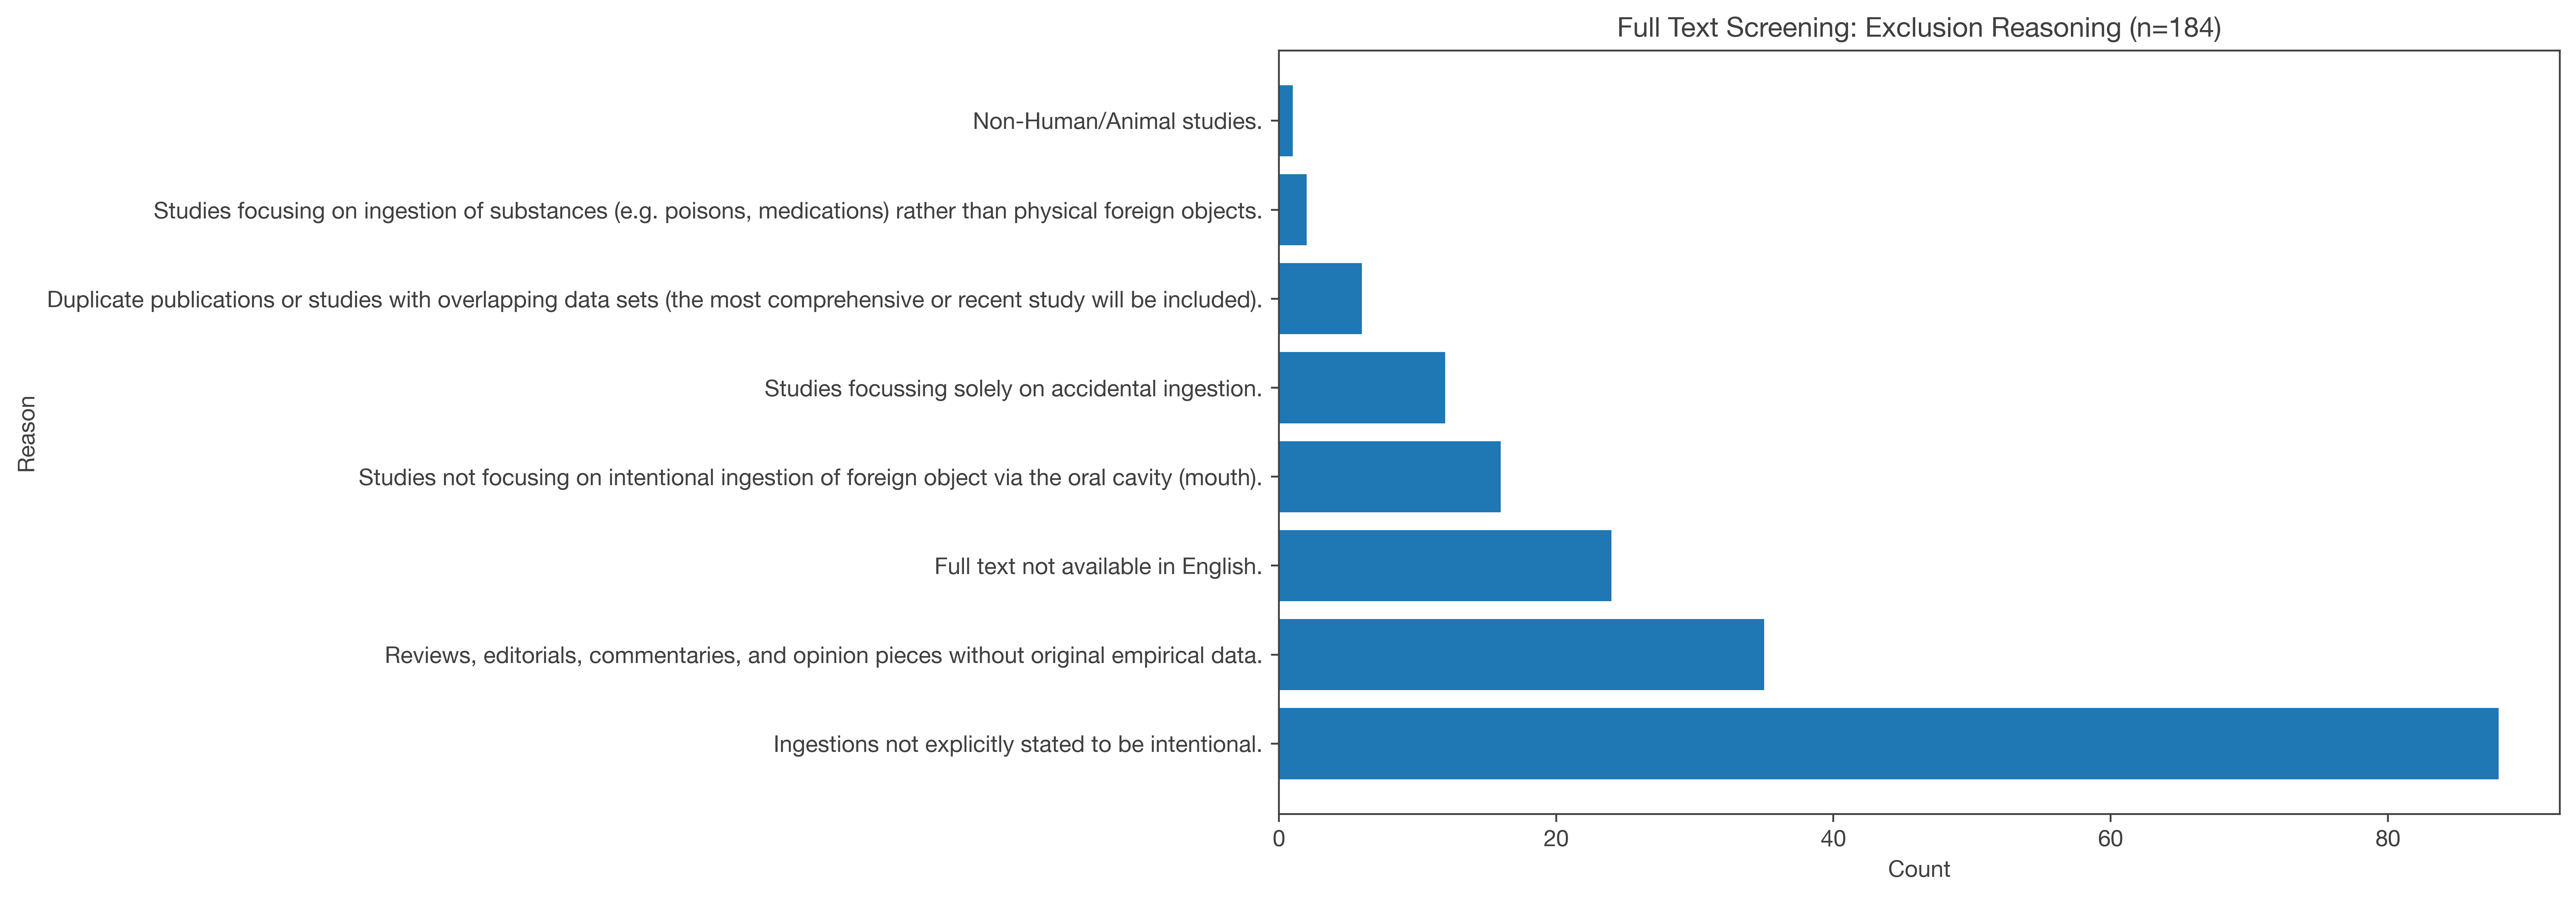

In [9]:
# Plot horizontal bar chart
plt.barh(y=jge_excluded_reasoning['Reason'],
         width=jge_excluded_reasoning['Count'])

# Plot labels
plt.xlabel("Count") # Y axis
plt.ylabel("Reason") # X axis
plt.title(f"Full Text Screening: Exclusion Reasoning (n={sum(jge_excluded_reasoning['Count'])})") # Title

# Show plot
plt.show()

Supervisor meeting

In [ ]:
jge_unclear.to_csv("/".join([PROC_DATA_DIR, "full_text_screen", "jge_unclear.csv"]))

In [15]:
# Export papers not excluded to CSV
jge_included.to_csv("/".join([PROC_DATA_DIR, "full_text_screen", "jge_included.csv"]), index=False)

In [11]:
jge_no_recorded_intention = jge_screened_df[jge_screened_df['Intention Reported'] == False]
len(jge_no_recorded_intention)

97

In [12]:
# Create sample of 10% of papers
ms_review_start_df = create_results_sample(full_text_review_start_df, 0.1, 42) # '42' argument specificies random number to great sample from

ms_review_start_df = ms_review_start_df.sort_values(by=["Publication Year", "Title"])

ms_review_start_df.to_csv("/".join([RAW_DATA_DIR, "full_text_screen", "full_text_screen_start_ms.csv"]), index=False)

Given sample size: 311
Calculating desired sample size... 10% of 311 = 31
Creating Sample Dataframe
